# 🛡️ Microsoft Malware Prediction Project

Welcome to this machine learning project based on a simplified version of the **Microsoft Malware Prediction** dataset.

🎯 **Goal**:  
Predict the likelihood of a Windows machine getting infected by malware, using various system and security features.

📦 **What the dataset contains**:  
- Information about hardware and software configurations  
- Security features (firewall, antivirus status, etc.)  
- Windows OS edition and version  
- Machine usage behavior (e.g., gamer mode, S Mode)

📚 **What we’ll cover**:
### 🔹 Supervised Learning
- Data cleaning & preprocessing
- Feature encoding
- Training a decision tree model
- Evaluating the model performance

### 🔹 Unsupervised Learning
- Clustering machines using K-Means
- Finding meaningful groups and patterns in the data

Let's dive in! 🚀


In [215]:
# import libraries
from re import split
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
# import train and split the data packge 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



### **1️⃣ Data Exploration & Preprocessing**

In [216]:
# import dataset
df = pd.read_csv('Microsoft_malware_dataset_min.csv')

In [217]:
# Display the first few rows of the dataset
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [218]:
# DISPLAY INFO ABOUT THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [219]:
# Dsplay the statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HasDetections,100000.0,0.499280,0.500002,0.0,0.0,0.0,1.0,1.0
Wdft_IsGamer,96585.0,0.281607,0.449785,0.0,0.0,0.0,1.0,1.0
Census_IsVirtualDevice,99815.0,0.006642,0.081230,0.0,0.0,0.0,0.0,1.0
Census_HasOpticalDiskDrive,100000.0,0.075850,0.264759,0.0,0.0,0.0,0.0,1.0
Firewall,98924.0,0.977326,0.148863,0.0,1.0,1.0,1.0,1.0
SMode,94068.0,0.000351,0.018727,0.0,0.0,0.0,0.0,1.0
IsProtected,99609.0,0.944864,0.228246,0.0,1.0,1.0,1.0,1.0
CountryIdentifier,100000.0,108.188050,62.989406,1.0,51.0,97.0,162.0,222.0


In [220]:
# Create a pandas profiling reports to gain insights into the dataset
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [221]:
# Checking for missing values in the dataset
df.isnull().sum()

HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

In [222]:
# check for duplicates in the dataset
df.duplicated().sum()

np.int64(79581)

In [223]:
# Drop all missing values since all of them are categoral features which means a missing value is just a luck of information
df.dropna(inplace=True)

In [224]:
# checking for missing values again 
df.isnull().sum()

HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
SMode                         0
IsProtected                   0
OsPlatformSubRelease          0
CountryIdentifier             0
dtype: int64

In [225]:
# drop duplicates if any
df.drop_duplicates(inplace=True)

In [226]:
#checking for duplicates again
df.duplicated().sum()

np.int64(0)

In [227]:
# encode all categorecal features to numerical values using One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)
# Display the first few rows of the dataset after encoding
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier,Census_OSEdition_Core,Census_OSEdition_CoreCountrySpecific,...,Census_OSEdition_ProfessionalEducationN,Census_OSEdition_ProfessionalN,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1
0,0,0.0,0.0,0,1.0,0.0,1.0,29,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0.0,0.0,0,1.0,0.0,1.0,93,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0,0.0,0.0,0,1.0,0.0,1.0,86,True,False,...,False,False,False,False,False,True,False,False,False,False
3,1,0.0,0.0,0,1.0,0.0,1.0,88,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,0.0,0.0,0,1.0,0.0,1.0,18,True,False,...,False,False,False,False,False,True,False,False,False,False


Text(0, 0.5, 'Count')

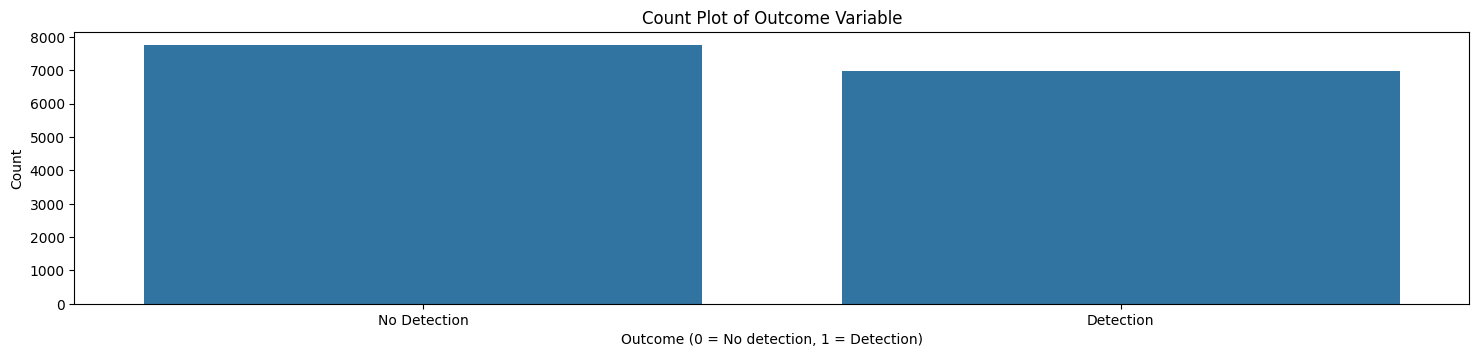

In [228]:
# 1️⃣ Count plot of the 'Outcome' variable
plt.figure(figsize=(18, 12))  # Adjust figure size for all subplots

# First plot (countplot of 'Outcome')
plt.subplot(3, 1, 1)  # 3 rows, 1 column, first plot
sns.countplot(x='HasDetections', data=df)
plt.title('Count Plot of Outcome Variable')
plt.xlabel('Outcome (0 = No detection, 1 = Detection)')
plt.xticks([0, 1], ['No Detection', 'Detection'])  # Set x-ticks to be more descriptive
plt.ylabel('Count')




### **2️⃣ Model Selection & Training**

## Part one: Supervised machine learning 

In [229]:
# split the dataset into features and target variable
X = df.drop('HasDetections', axis=1)  # Features (all columns except 'HasDetections')
y = df['HasDetections']  # Target variable ('HasDetections')

In [230]:
# split the data into training and testing sets using StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)
# Iterate over each split
for train_index, test_index in skf.split(X, y):
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [231]:
# Fit the scaler on the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [232]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid with additional parameters
dt_params = {
    'max_depth': [5, 10, 15, 20, 25, None],  # Add None to allow for no maximum depth (full tree)
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None],  # Try both balanced and no weight
    'max_features': ['sqrt', 'log2', None],  # Max features options
    'splitter': ['best', 'random'],  # Splitter options to try
}

# Set up GridSearchCV with the new hyperparameters
dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_params,
    scoring='f1',        # Optimize for F1-score
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Use all available CPU cores
    verbose=2
)

# Fit the model
dt_grid.fit(X_train, y_train)

# Retrieve the best model
best_dt_model = dt_grid.best_estimator_

# Predict on the test set
dt_pred = best_dt_model.predict(X_test)

# Evaluate the model
print("Best Parameters:", dt_grid.best_params_)
print("Best Cross-Validation F1-Score:", dt_grid.best_score_)
print("Test F1-Score:", f1_score(y_test, dt_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))

# Calculate accuracy using sklearn's accuracy_score function
test_accuracy = accuracy_score(y_test, dt_pred)

# Additional evaluations: Accuracy and confusion matrix
print("Test Accuracy:", test_accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_pred))

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 2, 'splitter': 'random'}
Best Cross-Validation F1-Score: 0.6502229232955097
Test F1-Score: 0.6273784355179705

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.23      0.33      1551
           1       0.50      0.85      0.63      1395

    accuracy                           0.52      2946
   macro avg       0.56      0.54      0.48      2946
weighted avg       0.57      0.52      0.47      2946

Test Accuracy: 0.5213849287169042

Confusion Matrix:
 [[ 349 1202]
 [ 208 1187]]


### ROC Curve and AUC:  
Evaluate the model’s ability to distinguish between classes.

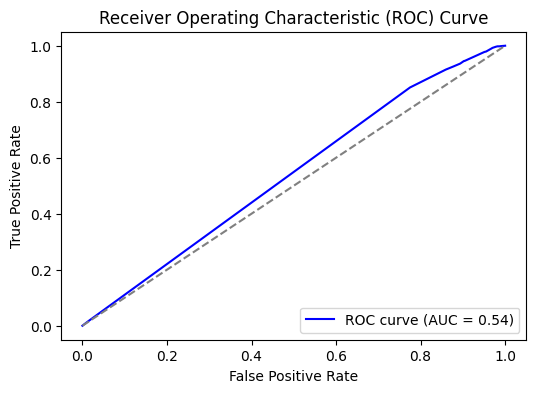

In [233]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


### Learning Curves:  
Check if the model is overfitting or underfitting.

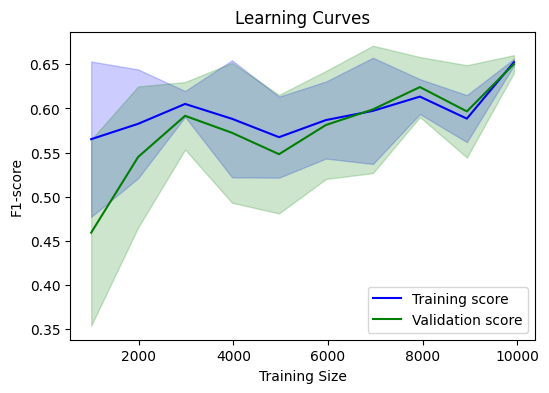

In [234]:
from sklearn.model_selection import learning_curve

# Get learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    best_dt_model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

# Calculate mean and standard deviation
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = validation_scores.mean(axis=1)
val_std = validation_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, color='blue', label='Training score')
plt.plot(train_sizes, val_mean, color='green', label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('F1-score')
plt.legend(loc='best')
plt.show()


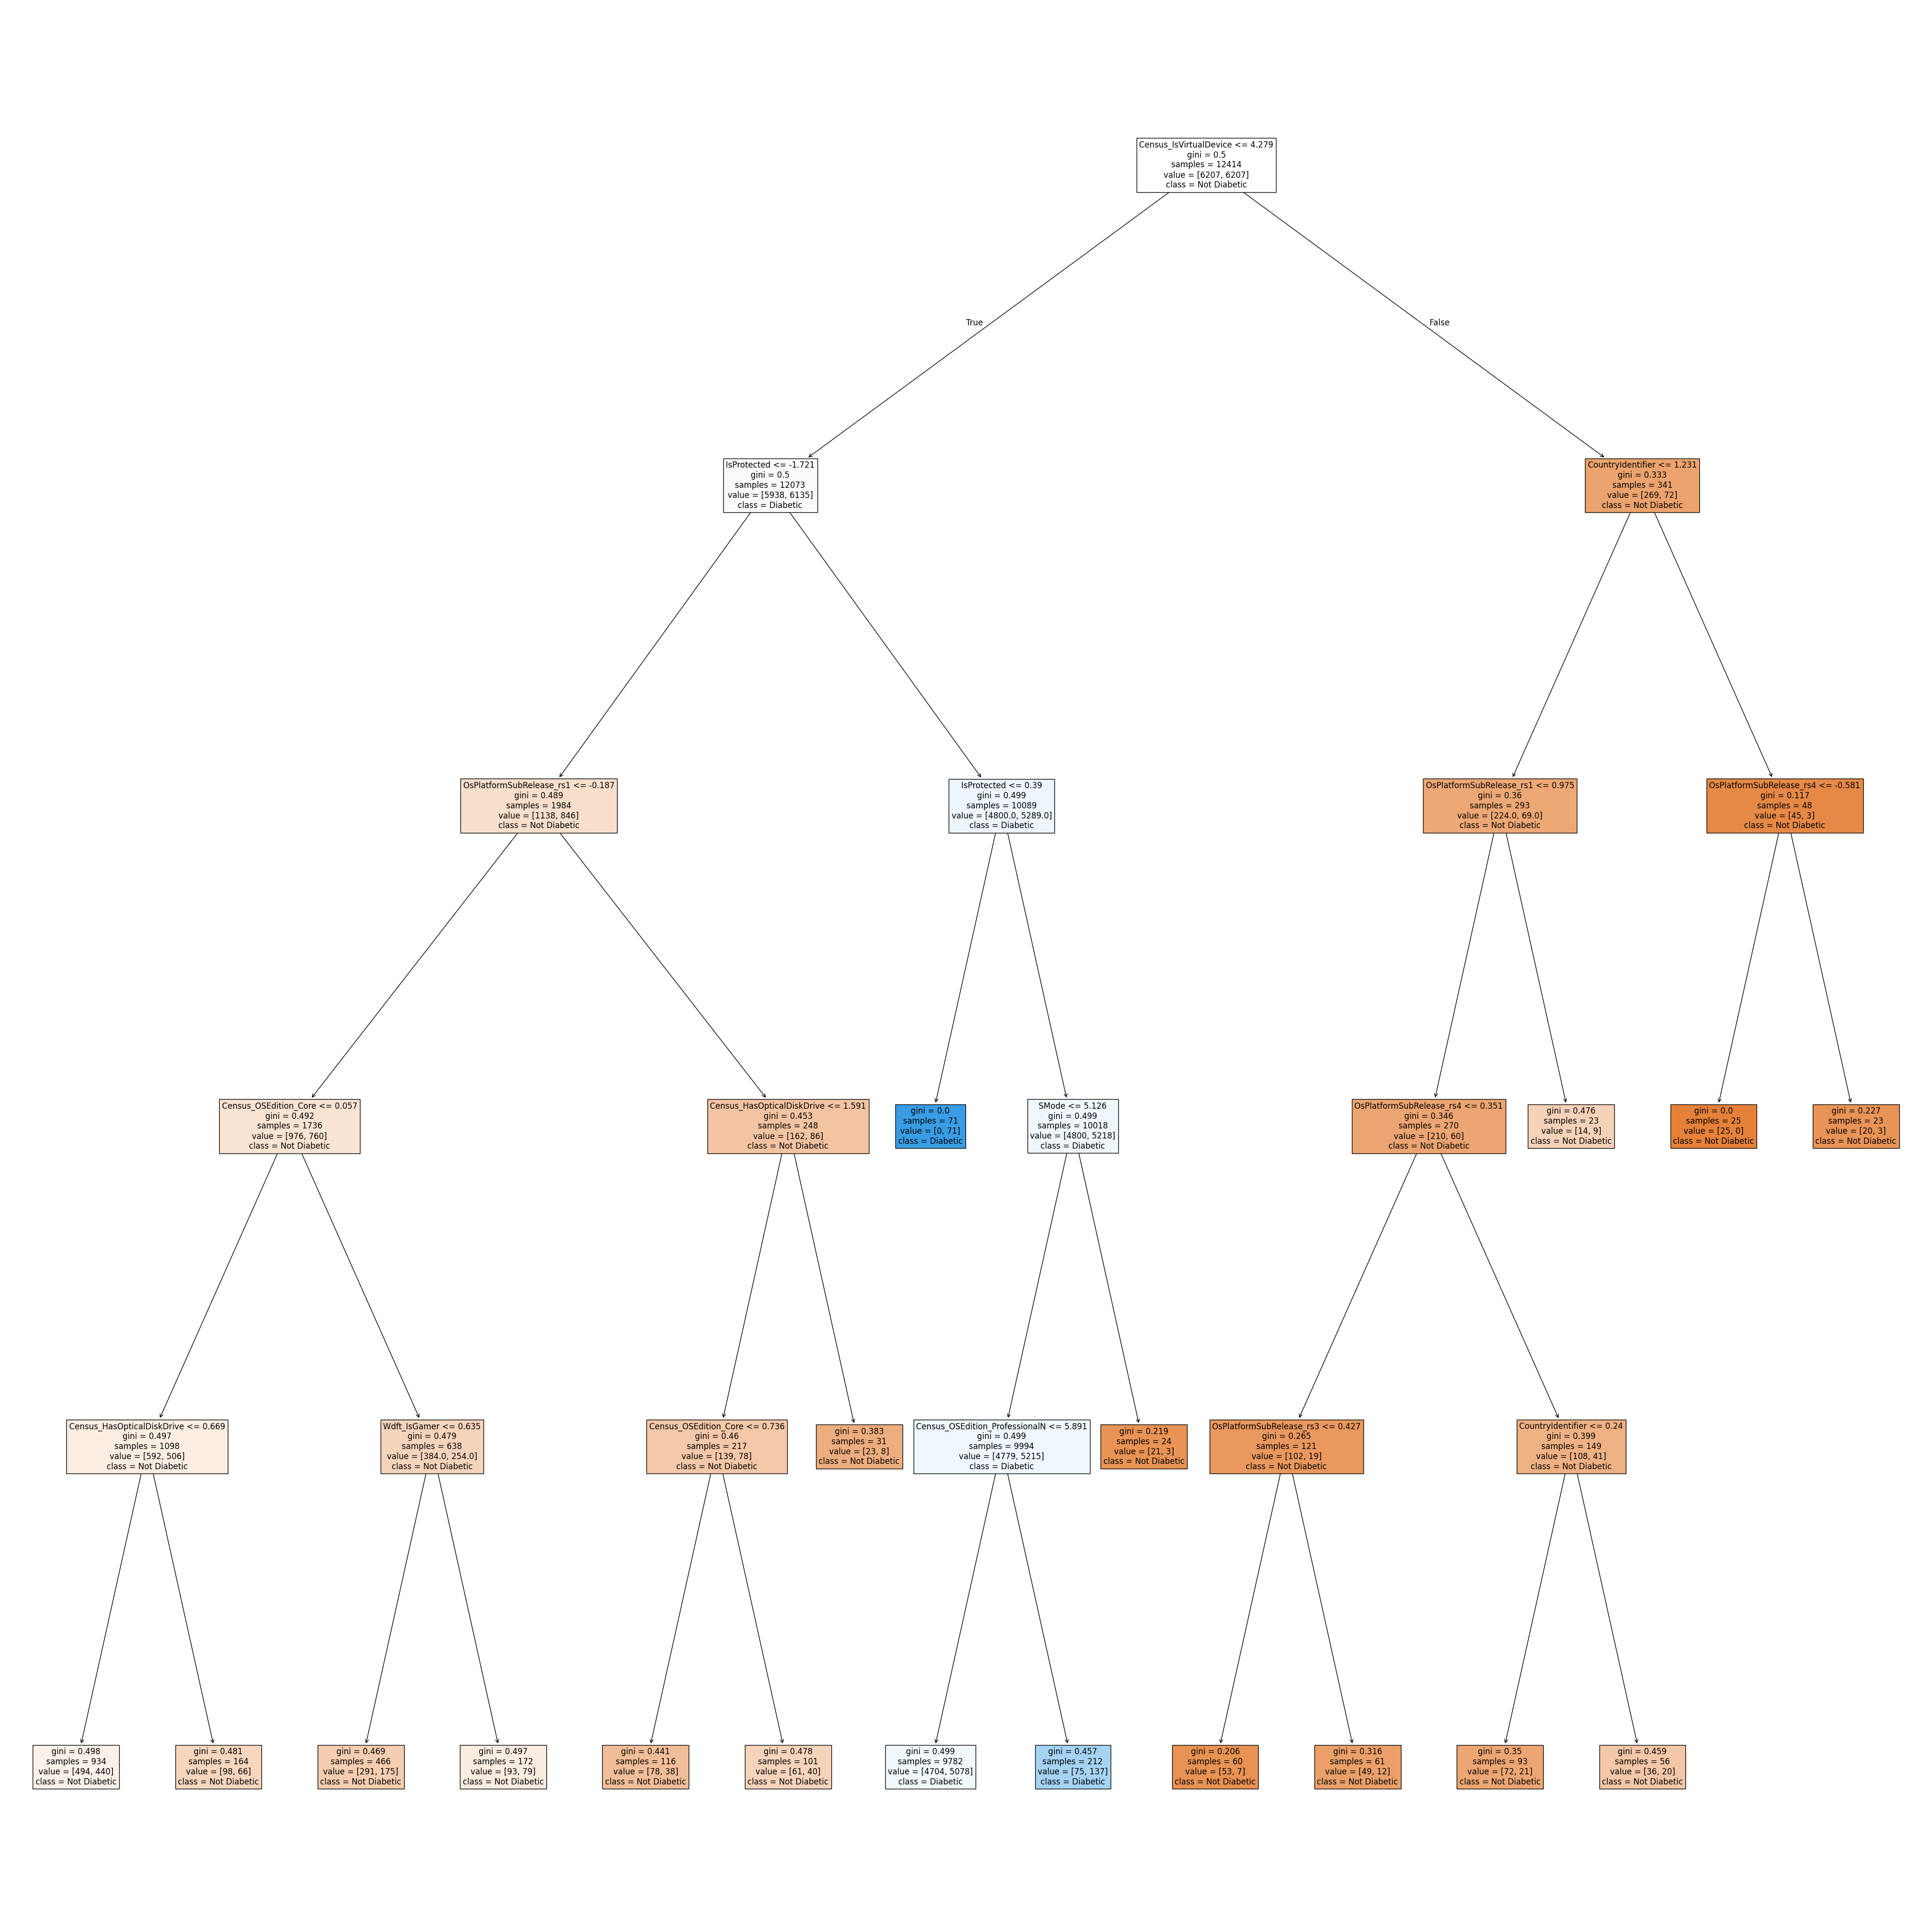

In [237]:
from sklearn import tree

# Use the best model from GridSearchCV
best_model = dt_grid.best_estimator_

# Set figure size for visualization
plt.figure(figsize=(50, 50))

# Plot the decision tree with increased font size
tree.plot_tree(best_model, feature_names=X.columns, class_names=["Not Diabetic", "Diabetic"], filled=True, fontsize=12)

# Adjust the plot to fit
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot
plt.show()

# Save the decision tree as a PNG file with increased resolution
plt.figure(figsize=(50, 50))
tree.plot_tree(best_model, feature_names=X.columns, class_names=["Not Diabetic", "Diabetic"], filled=True, fontsize=12)
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.close()

## Part two: Unsupervised Machine Learning

In [238]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Drop the target variable 'HasDetections' from the DataFrame
x = df.drop(columns=['HasDetections'])  

# Scale the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

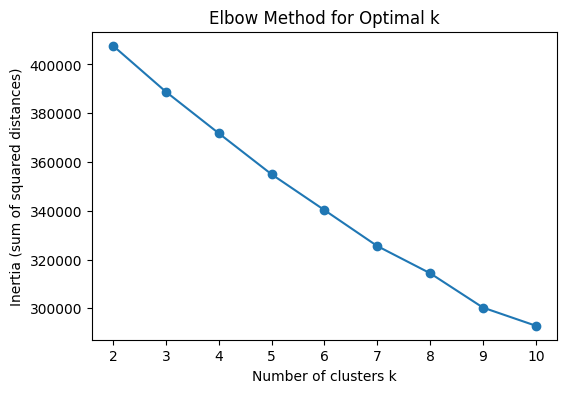

In [239]:
# Elbow Method to find optimal k
inertia = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

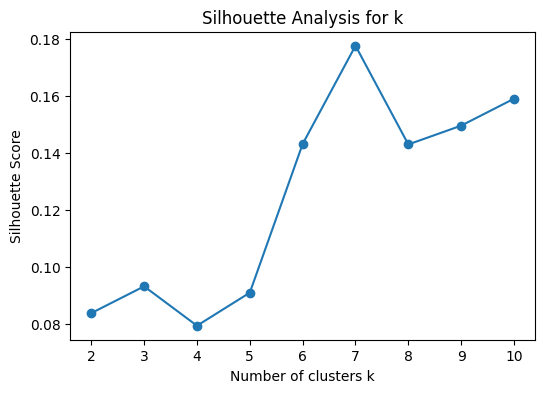

In [240]:
# Silhouette Analysis to find optimal k
sil_scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=50)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(k_range, sil_scores, 'o-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for k')
plt.show()

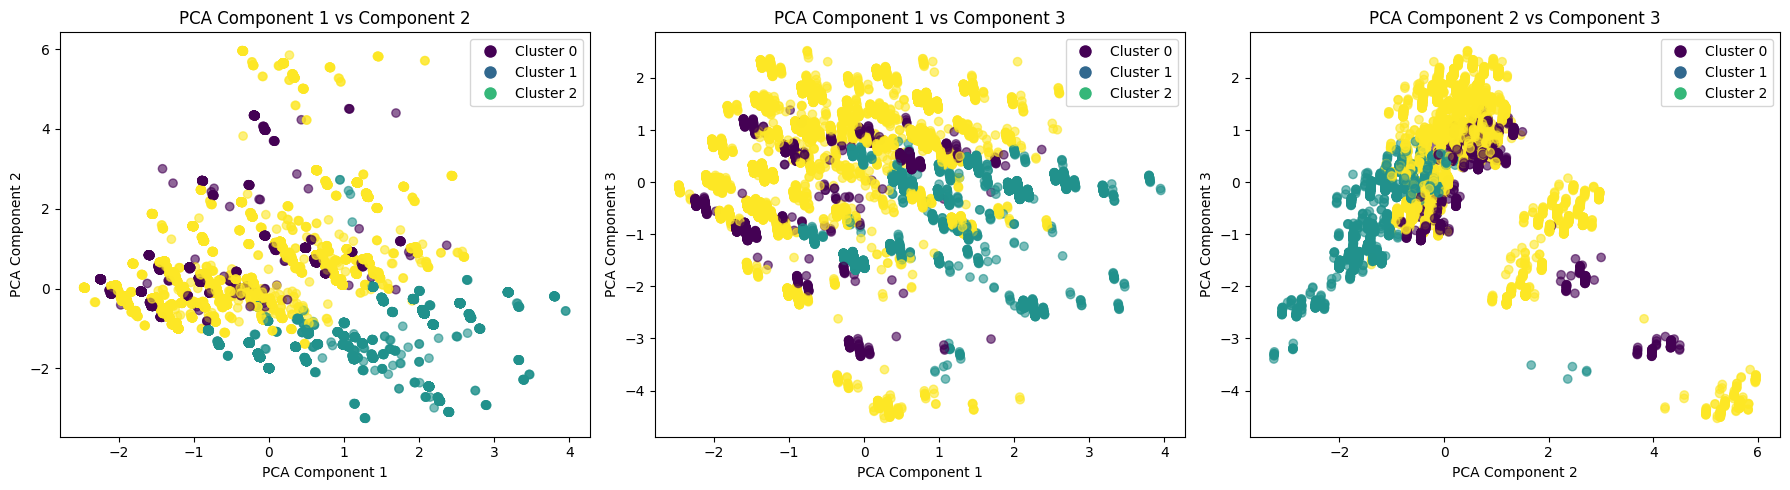

In [241]:
# From the two plots, pick k where:
#  - the elbow “bends” (inertia drops less sharply)
#  - silhouette score peaks
optimal_k = 3  

# Fit final KMeans model with optimal k
final_km = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = final_km.fit_predict(X_scaled)

# Fit PCA with 3 components
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create subplots for each PCA axis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for PCA Component 1 vs PCA Component 2
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')
axes[0].set_title('PCA Component 1 vs Component 2')
axes[0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / optimal_k), markersize=10) for i in range(optimal_k)], 
               labels=[f'Cluster {i}' for i in range(optimal_k)])

# Plot for PCA Component 1 vs PCA Component 3
axes[1].scatter(X_pca[:, 0], X_pca[:, 2], c=cluster_labels, cmap='viridis', alpha=0.6)
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 3')
axes[1].set_title('PCA Component 1 vs Component 3')
axes[1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / optimal_k), markersize=10) for i in range(optimal_k)], 
               labels=[f'Cluster {i}' for i in range(optimal_k)])

# Plot for PCA Component 2 vs PCA Component 3
axes[2].scatter(X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis', alpha=0.6)
axes[2].set_xlabel('PCA Component 2')
axes[2].set_ylabel('PCA Component 3')
axes[2].set_title('PCA Component 2 vs Component 3')
axes[2].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / optimal_k), markersize=10) for i in range(optimal_k)], 
               labels=[f'Cluster {i}' for i in range(optimal_k)])

plt.tight_layout()
plt.show()

                             PC1  PC1_Contribution  \
0  Census_OSEdition_Professional          0.552965   
1          Census_OSEdition_Core          0.496897   
2       OsPlatformSubRelease_rs4          0.415783   
3         Census_IsVirtualDevice          0.204751   
4                    IsProtected          0.201199   

                             PC2  PC2_Contribution  \
0       OsPlatformSubRelease_th1          0.545715   
1       OsPlatformSubRelease_rs4          0.458016   
2    Census_OSEdition_Enterprise          0.407765   
3          Census_OSEdition_Core          0.287197   
4  Census_OSEdition_Professional          0.238270   

                           PC3  PC3_Contribution  
0     OsPlatformSubRelease_rs3          0.439214  
1     OsPlatformSubRelease_th1          0.372955  
2        Census_OSEdition_Core          0.365536  
3  Census_OSEdition_Enterprise          0.341115  
4     OsPlatformSubRelease_rs4          0.299553  


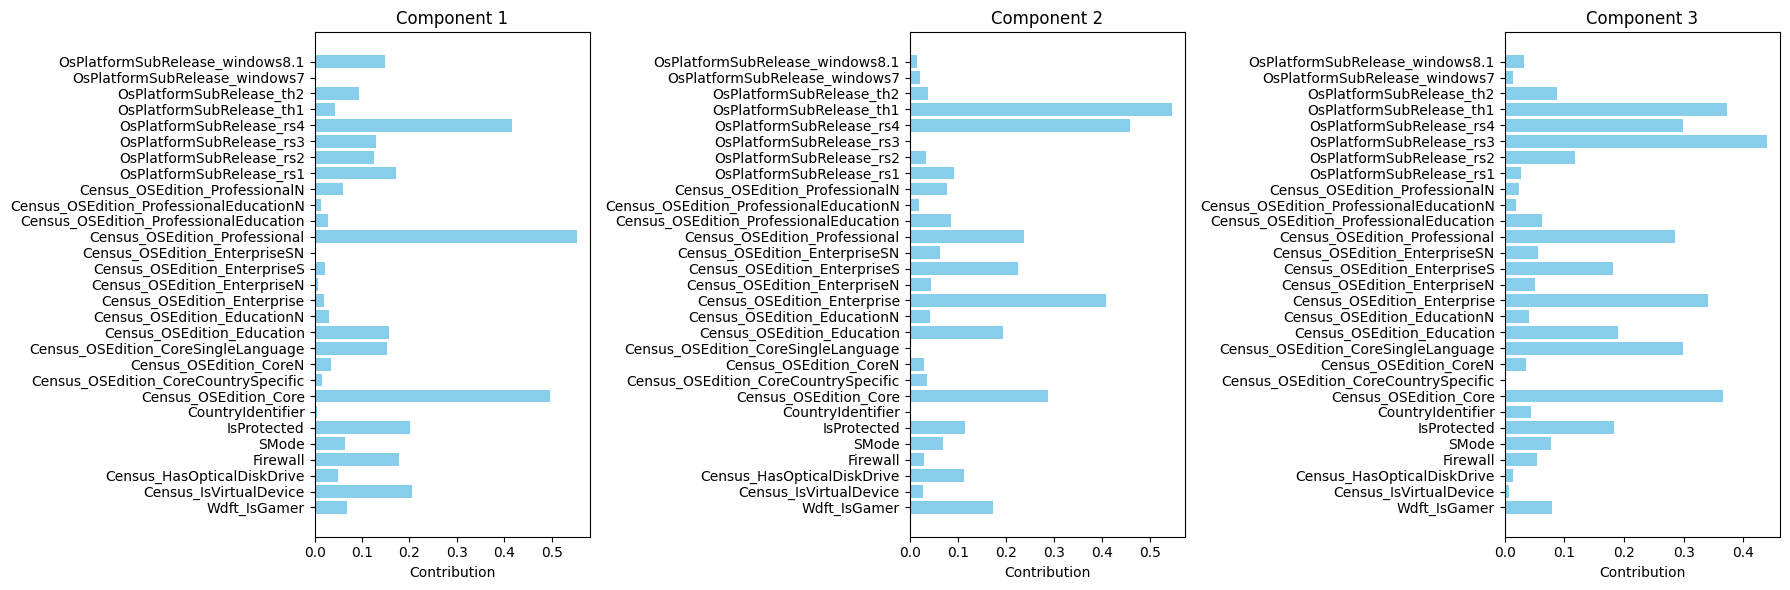

In [242]:
# Convert X_scaled back to a DataFrame to access column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Get the absolute value of the components to understand contribution (larger values contribute more)
pca_components = pd.DataFrame(np.abs(pca.components_), columns=X_scaled_df.columns)

# For each principal component, get the top N contributing features
top_n = 5  # You can change this to how many features you want to show for each component

# Get the top N features for each component
top_features = pd.DataFrame()

for i in range(pca.components_.shape[0]):
    sorted_features = pca_components.iloc[i].sort_values(ascending=False).head(top_n)
    top_features[f'PC{i+1}'] = sorted_features.index
    top_features[f'PC{i+1}_Contribution'] = sorted_features.values

# Display the top features for each component
print(top_features)

# Optionally, if you'd like to visualize the contributions:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(pca.components_.shape[0]):
    axes[i].barh(pca_components.columns, pca_components.iloc[i], color='skyblue')
    axes[i].set_title(f'Component {i+1}')
    axes[i].set_xlabel('Contribution')

plt.tight_layout()
plt.show()

# 🧠 PCA + Clustering Interpretation for Malware Detection

We performed PCA and clustering on the dataset to uncover meaningful patterns about the vulnerability of devices to malware or viruses 🦠.  
Below is the breakdown of the **Principal Components** (PCs) and the **clusters** identified.

---

## 📊 Principal Components Breakdown

### 🔵 PC1: Operating System Editions and Security
- **Top Features:**
  - `Census_OSEdition_Professional` (**0.55**)
  - `Census_OSEdition_Core` (**0.49**)
  - `OsPlatformSubRelease_rs4` (**0.41**)
  - `Census_IsVirtualDevice` (**0.20**)
  - `IsProtected` (**0.20**)
- **Interpretation:**
  - Strongly separates devices based on **OS edition** (Professional vs Core).
  - Also differentiates **virtual** vs **physical** machines.
  - Systems with security software (`IsProtected`) matter here.
  
🔎 **Focus:** OS sophistication and basic protection status.

---

### 🟠 PC2: Platform Versions and Enterprise-Level Systems
- **Top Features:**
  - `OsPlatformSubRelease_th1` (**0.54**)
  - `OsPlatformSubRelease_rs4` (**0.45**)
  - `Census_OSEdition_Enterprise` (**0.40**)
  - `Census_OSEdition_Core` (**0.28**)
  - `Census_OSEdition_Professional` (**0.23**)
- **Interpretation:**
  - Focus on **OS platform updates** (TH1, RS4).
  - Clear separation between **Enterprise** vs **Core/Professional** devices.

🔎 **Focus:** Newer vs older platform releases; large-scale deployments (e.g., corporate machines).

---

### 🟢 PC3: Legacy vs Updated OS Versions
- **Top Features:**
  - `OsPlatformSubRelease_rs3` (**0.44**)
  - `OsPlatformSubRelease_th1` (**0.37**)
  - `Census_OSEdition_Core` (**0.36**)
  - `Census_OSEdition_Enterprise` (**0.34**)
  - `OsPlatformSubRelease_rs4` (**0.29**)
- **Interpretation:**
  - Highlights differences between slightly older and newer **OS versions**.
  - Emphasizes the **OS edition** distinctions (Core, Enterprise).

🔎 **Focus:** Update frequency and possible tech obsolescence.

---

## 🗺️ Visualization of Clusters (Based on PCs)

![Clusters Visualization](attachment-path)

### 🎯 What We See:
- **Cluster 0** (Purple):  
  Devices scattered but showing more extreme values in some PCs (especially PC1 and PC3) ➔ **Possible outdated OS or less protected devices** ❗

- **Cluster 1** (Teal):  
  Forms a dense region, closer to the center in most plots ➔ **Likely moderately updated and reasonably protected devices** 🔒

- **Cluster 2** (Yellow):  
  Clustered neatly and consistently across all three PCA views ➔ **Most homogenous group — likely newer OS versions, better security** 🛡️

---

## 🚨 Final Interpretation on Malware Danger
| Cluster | Risk Assessment | Reason |
|:-------:|:---------------:|:------:|
| **0**   | 🟥 **High Risk** | Outdated systems, lower protection |
| **1**   | 🟨 **Medium Risk** | Mixed security and update status |
| **2**   | 🟩 **Low Risk** | Updated OS versions, enterprise-level protection |

---

# 📌 Conclusion
- PCA helped reveal clear structural differences based on OS editions, platform releases, and protection status.
- Clustering identified groups that **correlate with cybersecurity risk levels**.
- **Focus next:** Reinforce security for Cluster 0 devices (patch OS, enable security software).

---
